# Tarefa 5 - Análise dos aprovados na UFMT 2025

In [263]:
import pdfplumber
import pandas as pd
import re  # Para expressões regulares
import matplotlib.pyplot as plt
import seaborn as sns

# Caminho do arquivo PDF
pdf_path = "Matrículas2025.pdf"

# Lista para armazenar os dados
data = []

# Expressão regular para capturar curso, turno, candidato e tipo de vaga
pattern = re.compile(r"(.+?) - (BACHARELADO|LICENCIATURA) - (INTEGRAL|NOTURNO|MATUTINO|VESPERTINO)\s+(.+?)\s+(\w+)$")

with pdfplumber.open(pdf_path) as pdf:
    for page in pdf.pages:
        text = page.extract_text()
        if text:
            lines = text.split("\n")
            for line in lines:
                match = pattern.match(line)
                if match:
                    curso = match.group(1).strip()
                    modalidade = match.group(2).strip()
                    turno = match.group(3).strip()
                    candidato = match.group(4).strip()
                    tipo_vaga = match.group(5).strip()
                    
                    data.append([curso, modalidade, turno, candidato, tipo_vaga])

# Criar DataFrame com colunas organizadas corretamente
df = pd.DataFrame(data, columns=["Curso", "Modalidade", "Turno", "Candidato", "Tipo_Vaga"])

# Exibir as primeiras linhas do DataFrame
df.head()

# Salvar em CSV para conferência
# df.to_csv("matriculas2025.csv", index=False)


,Curso,Modalidade,Turno,Candidato,Tipo_Vaga
0,AGRONOMIA,BACHARELADO,INTEGRAL,ANA JULIA LUZ DA SILVA,LB_PPI
1,AGRONOMIA,BACHARELADO,INTEGRAL,ANDRESSA LORENZETTI GOLDONI,A0
2,AGRONOMIA,BACHARELADO,INTEGRAL,BRUNO SANTOS DE SOUSA,A0
3,AGRONOMIA,BACHARELADO,INTEGRAL,CARLOS EDUARDO TEIXEIRA GOMES,LI_PPI
4,AGRONOMIA,BACHARELADO,INTEGRAL,DAYARA ADRIELLY SOARES SILVA,A0


In [264]:
print("Valores nulos:\n", df.isnull().sum())

Valores nulos:
 Curso         0
Modalidade    0
Turno         0
Candidato     0
Tipo_Vaga     0
dtype: int64


In [265]:
print("\nContagem de valores únicos por coluna:")
print(df.nunique())


Contagem de valores únicos por coluna:
Curso           50
Modalidade       2
Turno            4
Candidato     1589
Tipo_Vaga        8
dtype: int64


In [266]:
print("Informações do DataFrame:")
print(df.info())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Curso       1589 non-null   object
 1   Modalidade  1589 non-null   object
 2   Turno       1589 non-null   object
 3   Candidato   1589 non-null   object
 4   Tipo_Vaga   1589 non-null   object
dtypes: object(5)
memory usage: 62.2+ KB
None


### Ajuste de Variaveis

In [267]:
# Selecionar colunas com dtype object e convertê-las para categoria
obj_cols = df.select_dtypes(include='object').columns
for col in obj_cols:
    df[col] = df[col].astype('category')

# Verificar as alterações
print("Após a conversão:")
print(df.info())

Após a conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Curso       1589 non-null   category
 1   Modalidade  1589 non-null   category
 2   Turno       1589 non-null   category
 3   Candidato   1589 non-null   category
 4   Tipo_Vaga   1589 non-null   category
dtypes: category(5)
memory usage: 89.5 KB
None


In [268]:
#resumo estatístico
print(df.describe(include='all'))


            Curso   Modalidade     Turno             Candidato Tipo_Vaga
count        1589         1589      1589                  1589      1589
unique         50            2         4                  1589         8
top     AGRONOMIA  BACHARELADO  INTEGRAL  ÂNDRIA VIEIRA FALCÃO        A0
freq           82         1275       845                     1      1030


## Ler o arquivos dos aprovados

In [269]:
#ler o arquivo csv
df_aprovados = pd.read_csv('listagem-alunos-aprovados-ies-1-10362.csv', sep=';')

#Informações sobre o conjunto de dados:
print("Informações sobre o conjunto de dados:")
print(df_aprovados.info())

Informações sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CO_IES                      4494 non-null   int64  
 1   NO_IES                      4494 non-null   object 
 2   SG_IES                      4494 non-null   object 
 3   SG_UF_IES                   4494 non-null   object 
 4   NO_CAMPUS                   4494 non-null   object 
 5   CO_IES_CURSO                4494 non-null   int64  
 6   NO_CURSO                    4494 non-null   object 
 7   DS_TURNO                    4494 non-null   object 
 8   DS_FORMACAO                 4494 non-null   object 
 9   QT_VAGAS_CONCORRENCIA       4494 non-null   int64  
 10  CO_INSCRICAO_ENEM           4494 non-null   object 
 11  NO_INSCRITO                 4494 non-null   object 
 12  NO_MODALIDADE_CONCORRENCIA  4494 non-null   object 

In [270]:
# Mostra as primeiras 5 linhas do DataFrame
print("Visualização das primeiras linhas:\n")
df_aprovados.head()

Visualização das primeiras linhas:



,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,...,ST_BONUS_PERC,QT_BONUS_PERC,NO_ACAO_AFIRMATIVA_BONUS,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO,ENSINO_MEDIO,QUILOMBOLA,DEFICIENTE,TIPO_CONCORRENCIA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,NÃO,NaN,NaN,"713,2","629,16",1,N,N,N,AC
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,NÃO,NaN,NaN,"698,42","629,16",2,N,N,N,AC
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,NÃO,NaN,NaN,"690,48","629,16",3,N,N,N,AC
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,NÃO,NaN,NaN,"690,26","629,16",4,S,N,N,AC
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,NÃO,NaN,NaN,"689,5","629,16",5,N,N,N,AC


In [271]:
print("Valores nulos:\n", df_aprovados.isnull().sum())

Valores nulos:
 CO_IES                           0
NO_IES                           0
SG_IES                           0
SG_UF_IES                        0
NO_CAMPUS                        0
CO_IES_CURSO                     0
NO_CURSO                         0
DS_TURNO                         0
DS_FORMACAO                      0
QT_VAGAS_CONCORRENCIA            0
CO_INSCRICAO_ENEM                0
NO_INSCRITO                      0
NO_MODALIDADE_CONCORRENCIA       0
ST_BONUS_PERC                    0
QT_BONUS_PERC                 4494
NO_ACAO_AFIRMATIVA_BONUS      4494
NU_NOTA_CANDIDATO                0
NU_NOTACORTE_CONCORRIDA          0
NU_CLASSIFICACAO                 0
ENSINO_MEDIO                     0
QUILOMBOLA                       0
DEFICIENTE                       0
TIPO_CONCORRENCIA                0
dtype: int64


In [272]:
#Remover colunas:
df_aprovados.drop(['QT_BONUS_PERC', 'NO_ACAO_AFIRMATIVA_BONUS'], axis=1, inplace=True)
df_aprovados.head()

,CO_IES,NO_IES,SG_IES,SG_UF_IES,NO_CAMPUS,CO_IES_CURSO,NO_CURSO,DS_TURNO,DS_FORMACAO,QT_VAGAS_CONCORRENCIA,...,NO_INSCRITO,NO_MODALIDADE_CONCORRENCIA,ST_BONUS_PERC,NU_NOTA_CANDIDATO,NU_NOTACORTE_CONCORRIDA,NU_CLASSIFICACAO,ENSINO_MEDIO,QUILOMBOLA,DEFICIENTE,TIPO_CONCORRENCIA
0,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,LAURA MARIA LIMA RIZZO,Ampla concorrência,NÃO,"713,2","629,16",1,N,N,N,AC
1,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,ANA MARIA CALDEIRA,Ampla concorrência,NÃO,"698,42","629,16",2,N,N,N,AC
2,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,PEDRO ITAGIBA MOREIRA PEDROTTI,Ampla concorrência,NÃO,"690,48","629,16",3,N,N,N,AC
3,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,KLAUS SCHROEDER JUNIOR,Ampla concorrência,NÃO,"690,26","629,16",4,S,N,N,AC
4,1,UNIVERSIDADE FEDERAL DE MATO GROSSO,UFMT,MT,Campus Universitário de Sinop,100778,AGRONOMIA,Integral,Bacharelado,50,...,DAVI TORREJAES DA COSTA CIECHORSKI,Ampla concorrência,NÃO,"689,5","629,16",5,N,N,N,AC


In [273]:
df_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CO_IES                      4494 non-null   int64 
 1   NO_IES                      4494 non-null   object
 2   SG_IES                      4494 non-null   object
 3   SG_UF_IES                   4494 non-null   object
 4   NO_CAMPUS                   4494 non-null   object
 5   CO_IES_CURSO                4494 non-null   int64 
 6   NO_CURSO                    4494 non-null   object
 7   DS_TURNO                    4494 non-null   object
 8   DS_FORMACAO                 4494 non-null   object
 9   QT_VAGAS_CONCORRENCIA       4494 non-null   int64 
 10  CO_INSCRICAO_ENEM           4494 non-null   object
 11  NO_INSCRITO                 4494 non-null   object
 12  NO_MODALIDADE_CONCORRENCIA  4494 non-null   object
 13  ST_BONUS_PERC               4494 non-null   obje

### Ajuste de Variaveis

In [274]:
#converter para float as colunas: NU_NOTA_CANDIDATO, NU_NOTACORTE_CONCORRIDA
df_aprovados['NU_NOTA_CANDIDATO'] = df_aprovados['NU_NOTA_CANDIDATO'].str.replace(',', '.').astype(float)
df_aprovados['NU_NOTACORTE_CONCORRIDA'] = df_aprovados['NU_NOTACORTE_CONCORRIDA'].str.replace(',', '.').astype(float)
df_aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CO_IES                      4494 non-null   int64  
 1   NO_IES                      4494 non-null   object 
 2   SG_IES                      4494 non-null   object 
 3   SG_UF_IES                   4494 non-null   object 
 4   NO_CAMPUS                   4494 non-null   object 
 5   CO_IES_CURSO                4494 non-null   int64  
 6   NO_CURSO                    4494 non-null   object 
 7   DS_TURNO                    4494 non-null   object 
 8   DS_FORMACAO                 4494 non-null   object 
 9   QT_VAGAS_CONCORRENCIA       4494 non-null   int64  
 10  CO_INSCRICAO_ENEM           4494 non-null   object 
 11  NO_INSCRITO                 4494 non-null   object 
 12  NO_MODALIDADE_CONCORRENCIA  4494 non-null   object 
 13  ST_BONUS_PERC               4494 

In [275]:
# Converter colunas do tipo object em df_aprovados para o tipo category
obj_cols_aprovados = df_aprovados.select_dtypes(include="object").columns
for col in obj_cols_aprovados:
    df_aprovados[col] = df_aprovados[col].astype("category")

print("Após a conversão:")
print(df_aprovados.info())

Após a conversão:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   CO_IES                      4494 non-null   int64   
 1   NO_IES                      4494 non-null   category
 2   SG_IES                      4494 non-null   category
 3   SG_UF_IES                   4494 non-null   category
 4   NO_CAMPUS                   4494 non-null   category
 5   CO_IES_CURSO                4494 non-null   int64   
 6   NO_CURSO                    4494 non-null   category
 7   DS_TURNO                    4494 non-null   category
 8   DS_FORMACAO                 4494 non-null   category
 9   QT_VAGAS_CONCORRENCIA       4494 non-null   int64   
 10  CO_INSCRICAO_ENEM           4494 non-null   category
 11  NO_INSCRITO                 4494 non-null   category
 12  NO_MODALIDADE_CONCORRENCIA  4494 non-null   category
 13  

In [276]:
#Resumo estatístico
print(df_aprovados.describe())

       CO_IES  CO_IES_CURSO  QT_VAGAS_CONCORRENCIA  NU_NOTA_CANDIDATO  \
count  4494.0  4.494000e+03            4494.000000        4494.000000   
mean      1.0  1.543224e+06              21.254784         598.248456   
std       0.0  7.765660e+06              14.422909          84.629078   
min       1.0  1.000000e+00               1.000000         227.960000   
25%       1.0  2.000000e+01               9.000000         539.940000   
50%       1.0  1.007780e+05              20.000000         600.550000   
75%       1.0  1.234270e+05              31.000000         660.590000   
max       1.0  5.001703e+07              56.000000         811.220000   

       NU_NOTACORTE_CONCORRIDA  NU_CLASSIFICACAO  
count              4494.000000       4494.000000  
mean                523.697348         12.286827  
std                 191.432231         12.000438  
min                   0.000000          1.000000  
25%                 497.835000          3.000000  
50%                 572.300000      

### Taxa de Matrícula por Curso - Comparar o número de aprovados e o número de matriculados em cada curso.


In [277]:
# Contar os matriculados por curso em df
matriculados_counts = df['Curso'].value_counts()

# Contar os aprovados por curso em df_aprovados (usando a coluna NO_CURSO)
aprovados_counts = df_aprovados['NO_CURSO'].value_counts()

# Combinar os valores em um único DataFrame, considerando apenas cursos presentes em ambos os DataFrames
common_courses = matriculados_counts.index.intersection(aprovados_counts.index)
matriculados_counts = matriculados_counts[common_courses]
aprovados_counts = aprovados_counts[common_courses]

rates_df = pd.DataFrame({
    'Matriculados': matriculados_counts,
    'Aprovados': aprovados_counts
})

# Calcular a taxa de matrícula em porcentagem
rates_df['Taxa_Matricula'] = (rates_df['Matriculados'] / rates_df['Aprovados']) * 100

# Exibir o resultado
print(rates_df)


                                    Matriculados  Aprovados  Taxa_Matricula
AGRONOMIA                                     82        231       35.497835
MEDICINA                                      77        140       55.000000
DIREITO                                       72        165       43.636364
ADMINISTRAÇÃO                                 57        126       45.238095
ENGENHARIA FLORESTAL                          52        157       33.121019
GEOGRAFIA                                     51        119       42.857143
ZOOTECNIA                                     51        190       26.842105
CIÊNCIAS ECONÔMICAS                           49        120       40.833333
MATEMÁTICA                                    49        106       46.226415
MEDICINA VETERINÁRIA                          49        140       35.000000
CIÊNCIAS CONTÁBEIS                            43         86       50.000000
ENFERMAGEM                                    43        140       30.714286
HISTÓRIA    

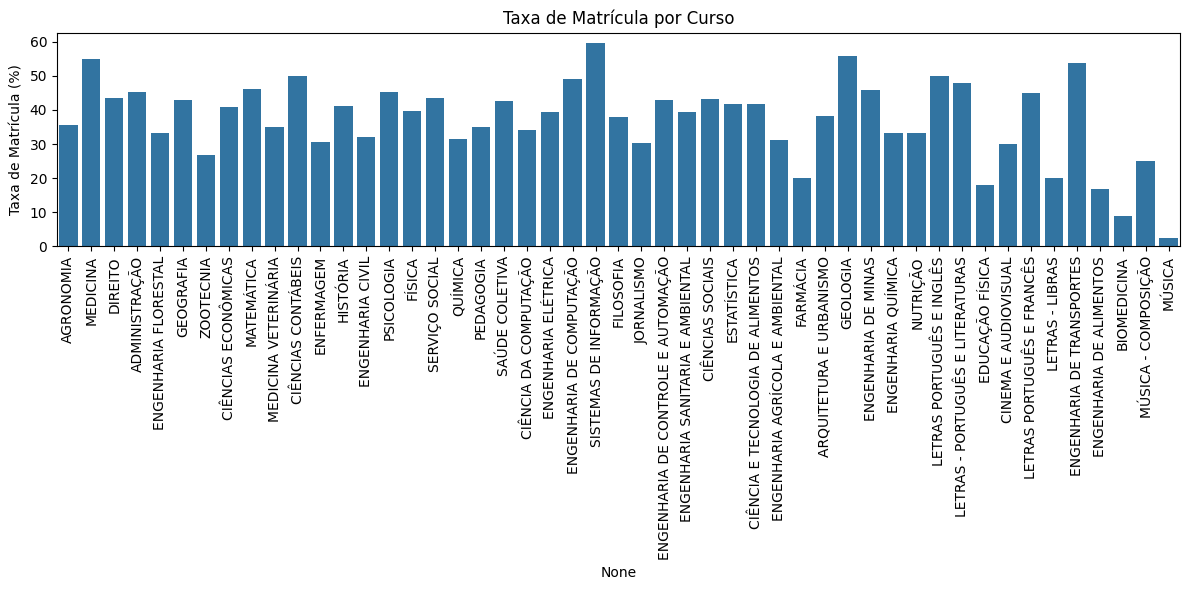

In [278]:
plt.figure(figsize=(12,6))
sns.barplot(x=rates_df.index, y="Taxa_Matricula", data=rates_df)
plt.xticks(rotation=90)
plt.ylabel("Taxa de Matrícula (%)")
plt.title("Taxa de Matrícula por Curso")
plt.tight_layout()
plt.show()



### Taxa de Matrícula por Modalidade de Ingresso - Verificar se há diferença na taxa de matrícula entre modalidades como SISU, cotas, vestibular próprio etc.


In [279]:
# Alterar os valores "A0" para "AC" na coluna "Tipo_Vaga" do DataFrame df
df['Tipo_Vaga'] = df['Tipo_Vaga'].replace("A0", "AC")

# Tirar o "  " sobrando em TIPO_CONCORRENCIA
df_aprovados['TIPO_CONCORRENCIA'] = df_aprovados['TIPO_CONCORRENCIA'].str.strip()


C:\Users\djalm\AppData\Local\Temp\ipykernel_15744\2066953844.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Tipo_Vaga'] = df['Tipo_Vaga'].replace("A0", "AC")


Index(['AC', 'LI_PPI', 'LI_EP', 'LB_PPI', 'LB_EP', 'LI_PCD', 'LB_PCD', 'LB_Q'], dtype='object')
        Matriculados  Aprovados  Taxa_Matricula
AC              1030       2478       41.565779
LI_PPI           247        674       36.646884
LI_EP            121        259       46.718147
LB_PPI           114        728       15.659341
LB_EP             40        185       21.621622
LI_PCD            23         83       27.710843
LB_PCD            11         46       23.913043
LB_Q               3         41        7.317073


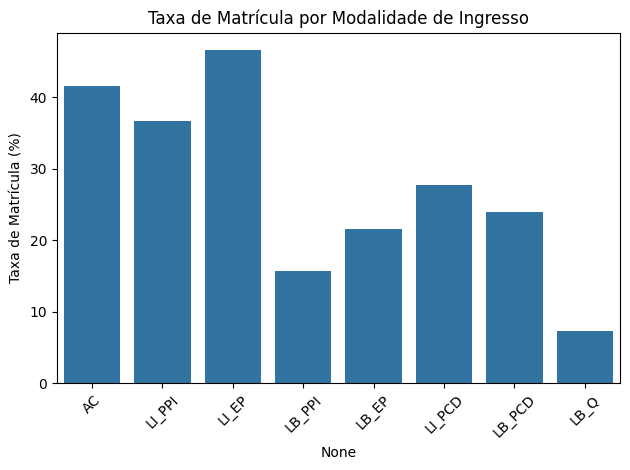

In [280]:
# Taxa de Matrícula por Modalidade de Ingresso
matriculados_modality = df['Tipo_Vaga'].value_counts()
aprovados_modality = df_aprovados['TIPO_CONCORRENCIA'].value_counts()

common_modalities = matriculados_modality.index.intersection(aprovados_modality.index)
taxa_modalidade_df = pd.DataFrame({
    'Matriculados': matriculados_modality[common_modalities],
    'Aprovados': aprovados_modality[common_modalities]
})

print(common_modalities)

taxa_modalidade_df['Taxa_Matricula'] = (
    taxa_modalidade_df['Matriculados'] / taxa_modalidade_df['Aprovados'] * 100
)

print(taxa_modalidade_df)

sns.barplot(x=taxa_modalidade_df.index, y='Taxa_Matricula', data=taxa_modalidade_df)
plt.ylabel('Taxa de Matrícula (%)')
plt.title('Taxa de Matrícula por Modalidade de Ingresso')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Sim, há uma grande difrença nas taxas matrícula entre as modalidades de ingresso.

### Taxa de Matrícula por Turno do Curso - Os cursos noturnos apresentam menor taxa de matrícula em comparação com os cursos diurnos?


            Matriculados  Aprovados  Taxa_Matricula
INTEGRAL             845       2402       35.179017
NOTURNO              384       1052       36.501901
MATUTINO             295        806       36.600496
VESPERTINO            65        234       27.777778


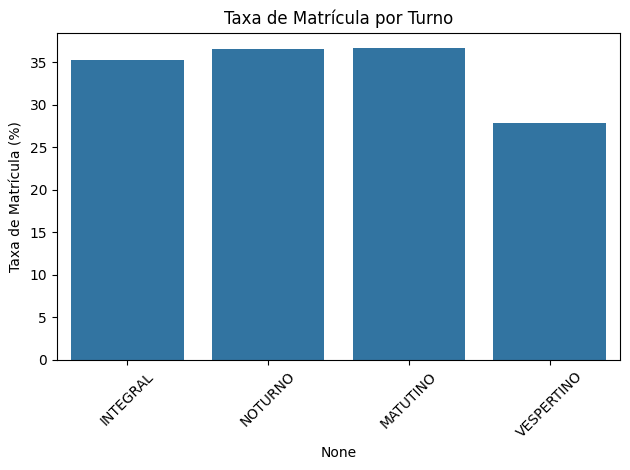

In [281]:
matriculados_turno = df['Turno'].str.upper().value_counts()
aprovados_turno = df_aprovados['DS_TURNO'].str.upper().value_counts()

common_turnos = matriculados_turno.index.intersection(aprovados_turno.index)
taxa_turno_df = pd.DataFrame({
    'Matriculados': matriculados_turno[common_turnos],
    'Aprovados': aprovados_turno[common_turnos]
})

taxa_turno_df['Taxa_Matricula'] = (
    taxa_turno_df['Matriculados'] / taxa_turno_df['Aprovados'] * 100
)

print(taxa_turno_df)

sns.barplot(x=taxa_turno_df.index, y='Taxa_Matricula', data=taxa_turno_df)
plt.ylabel('Taxa de Matrícula (%)')
plt.title('Taxa de Matrícula por Turno')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Os cursos noturnos não apresentam menor taxa de matricula em comparacao aos diurnos.

### Taxa de Matrícula por Tipo de Formação - Bacharelados e licenciaturas possuem diferenças na taxa de matrícula?


              Matriculados  Aprovados  Taxa_Matricula
Bacharelado           1275       3422       37.258913
Licenciatura           314        960       32.708333


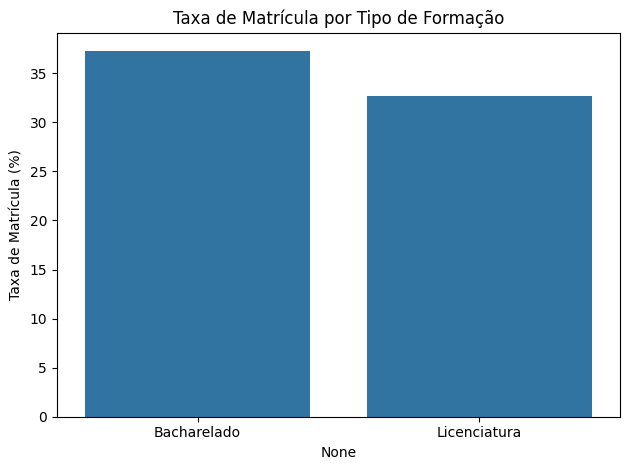

In [282]:
# Exibir o DataFrame com a taxa de matrícula por tipo de formação
print(rates_modal_df)

# Plotar a taxa de matrícula por tipo de formação
sns.barplot(x=rates_modal_df.index, y="Taxa_Matricula", data=rates_modal_df)
plt.ylabel("Taxa de Matrícula (%)")
plt.title("Taxa de Matrícula por Tipo de Formação")
plt.tight_layout()
plt.show()

Sim, possuem diferenças, sendo Bacharelado o de maior taxa de Matricula

### Comparação do Desempenho dos Matriculados vs. Aprovados Não Matriculados - Os alunos que efetivamente se matriculam possuem notas mais altas no processo seletivo do que aqueles que não se matriculam?


Estatísticas das notas:
              count        mean        std     min     25%     50%     75%  \
Matriculado                                                                  
False        2931.0  588.268707  82.878392  227.96  529.29  589.52  650.98   
True         1563.0  616.962879  84.731407  229.66  561.24  619.72  676.55   

                max  
Matriculado          
False        811.22  
True         809.82  


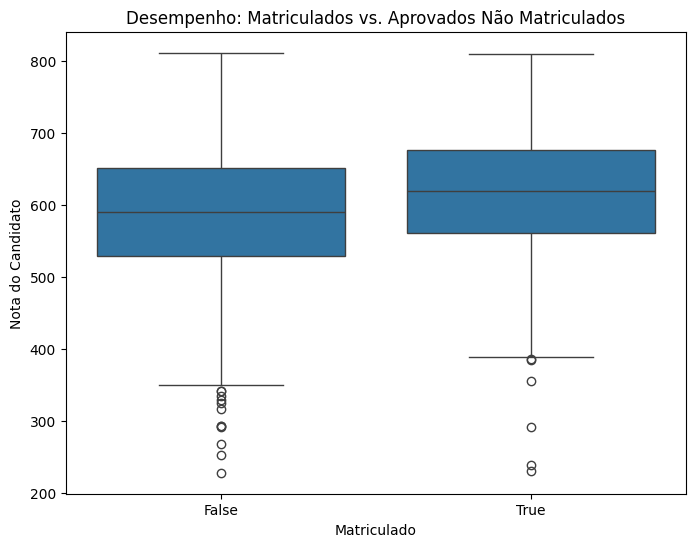

In [283]:
# Criar um conjunto com os nomes dos candidatos matriculados
matriculados_set = set(df['Candidato'].astype(str))

# Adicionar uma coluna "Matriculado" em df_aprovados para identificar os aprovados que efetuaram matrícula
df_aprovados['Matriculado'] = df_aprovados['NO_INSCRITO'].astype(str).isin(matriculados_set)

# Exibir estatísticas descritivas das notas dos candidatos, separadas por grupo
print("Estatísticas das notas:")
print(df_aprovados.groupby('Matriculado')['NU_NOTA_CANDIDATO'].describe())

# Visualizar a distribuição das notas com um boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Matriculado', y='NU_NOTA_CANDIDATO', data=df_aprovados)
plt.xlabel("Matriculado")
plt.ylabel("Nota do Candidato")
plt.title("Desempenho: Matriculados vs. Aprovados Não Matriculados")
plt.show()

### Análise de Vagas Ociosas por Curso e Turno - Quais cursos e turnos apresentam mais vagas não preenchidas após a matrícula?


Cursos e turnos com vagas ociosas (apenas valores positivos):
                                Curso     Turno  Vagas_Ofertadas  \
2                       ADMINISTRAÇÃO   NOTURNO             31.0   
8             ARQUITETURA E URBANISMO  INTEGRAL             31.0   
12                        BIOMEDICINA  INTEGRAL             22.0   
17               CINEMA E AUDIOVISUAL  MATUTINO             14.0   
26  CIÊNCIA E TECNOLOGIA DE ALIMENTOS   NOTURNO             30.0   

    Matriculados  Vagas_Ociosas  Vagas_Ociosas_Pos  
2             26            5.0                5.0  
8             24            7.0                7.0  
12             4           18.0               18.0  
17             9            5.0                5.0  
26            25            5.0                5.0  

Cursos com mais vagas ociosas:
Curso
FÍSICA                       70.0
ENGENHARIA DE TRANSPORTES    24.0
DIREITO                      22.0
QUÍMICA                      21.0
MÚSICA                       19.0
BIO

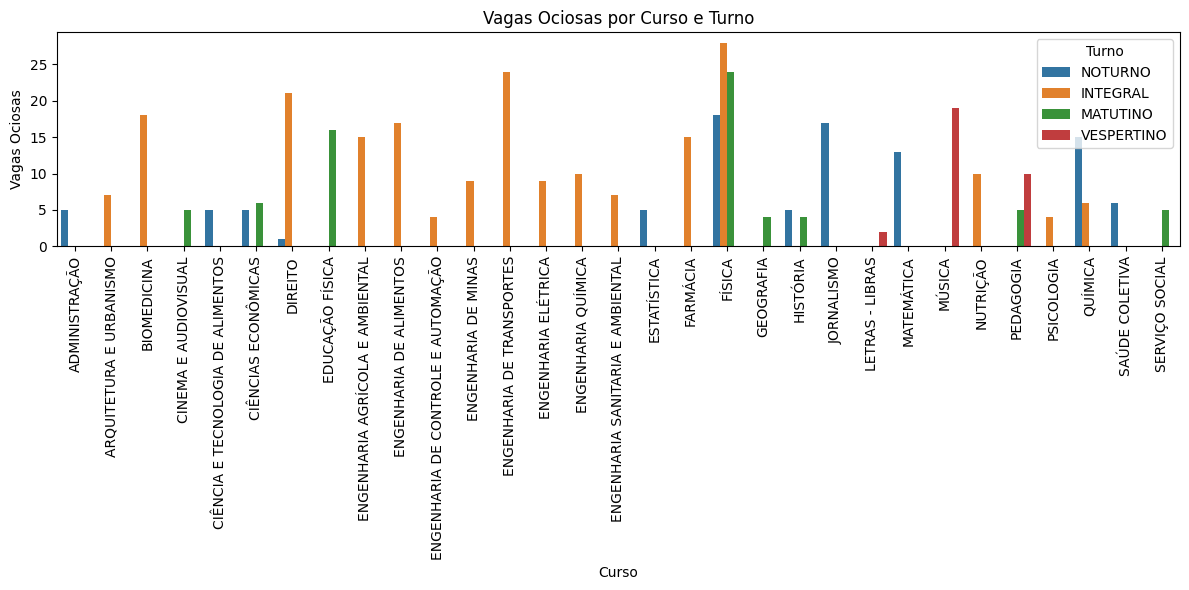

In [284]:
# Filtrar as linhas onde há informação de Vagas_Ofertadas
df_vagas_turno = vagas_ociosas_turno.dropna(subset=['Vagas_Ofertadas']).copy()

# Recalcular vagas ociosas como (Vagas_Ofertadas - Matriculados), mas considerando 0 quando negativo
df_vagas_turno['Vagas_Ociosas_Pos'] = (df_vagas_turno['Vagas_Ofertadas'] - df_vagas_turno['Matriculados']).clip(lower=0)

# Selecionar apenas as linhas com vagas ociosas (positivas)
df_ociosas = df_vagas_turno[df_vagas_turno['Vagas_Ociosas_Pos'] > 0]
print("Cursos e turnos com vagas ociosas (apenas valores positivos):")
# print(df_ociosas)
print(df_ociosas.head())

# cursos com mais vagas ociosas
cursos_vagas_ociosas = df_ociosas.groupby('Curso')['Vagas_Ociosas_Pos'].sum().sort_values(ascending=False)
print("\nCursos com mais vagas ociosas:")
print(cursos_vagas_ociosas.head(10))

# Visualização com Seaborn
plt.figure(figsize=(12,6))
sns.barplot(data=df_ociosas, x='Curso', y='Vagas_Ociosas_Pos', hue='Turno')
plt.xticks(rotation=90)
plt.ylabel("Vagas Ociosas")
plt.title("Vagas Ociosas por Curso e Turno")
plt.tight_layout()
plt.show()

### Impacto da Concorrência e Nota de Corte na Matrícula - Cursos com maior concorrência (maior nota de corte) têm maior taxa de matrícula?


Correlação entre Taxa de Matrícula e Nota de Corte (média): 0.0005157814716518172


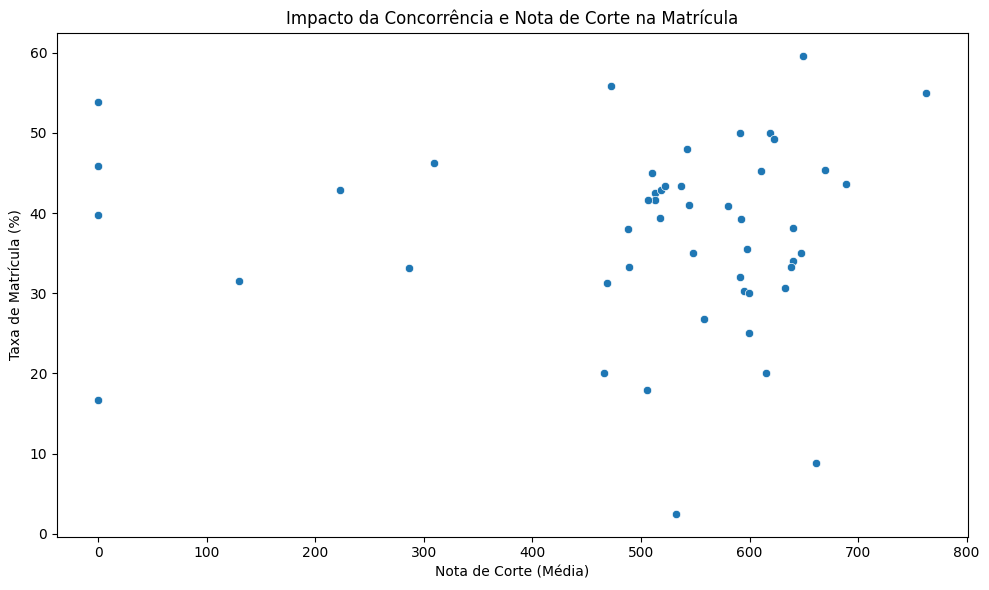

In [285]:
# Calcular a média da nota de corte por curso no df_aprovados
cutoff_df = df_aprovados.groupby("NO_CURSO", observed=False)["NU_NOTACORTE_CONCORRIDA"].mean()

# Combinar com rates_df (índice do rates_df são os nomes dos cursos)
impact_df = rates_df.merge(cutoff_df, left_index=True, right_index=True, how="inner")
impact_df.rename(columns={"NU_NOTACORTE_CONCORRIDA": "Nota_Corte_Media"}, inplace=True)

# Calcular a correlação entre a taxa de matrícula e a nota de corte
corr = impact_df["Taxa_Matricula"].corr(impact_df["Nota_Corte_Media"])
print("Correlação entre Taxa de Matrícula e Nota de Corte (média):", corr)

# Plotar a relação
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Nota_Corte_Media", y="Taxa_Matricula", data=impact_df)
plt.xlabel("Nota de Corte (Média)")
plt.ylabel("Taxa de Matrícula (%)")
plt.title("Impacto da Concorrência e Nota de Corte na Matrícula")
plt.tight_layout()
plt.show()

Observa-se que pelo grafico e a correlaçao que a variação na Nota de Corte não está associada de forma linear com a variação na Taxa de Matrícula.

### Diferença na Taxa de Matrícula entre Cotistas e Não Cotistas - Estudantes cotistas e não cotistas possuem taxas de matrícula diferentes?


Taxa de Matrícula por Tipo de Concorrência:
TIPO_CONCORRENCIA
AC        40.879742
LB_EP     21.081081
LB_PCD    21.739130
LB_PPI    15.384615
LB_Q       7.317073
LI_EP     46.718147
LI_PCD    26.506024
LI_PPI    36.053412
Name: Matriculado, dtype: float64


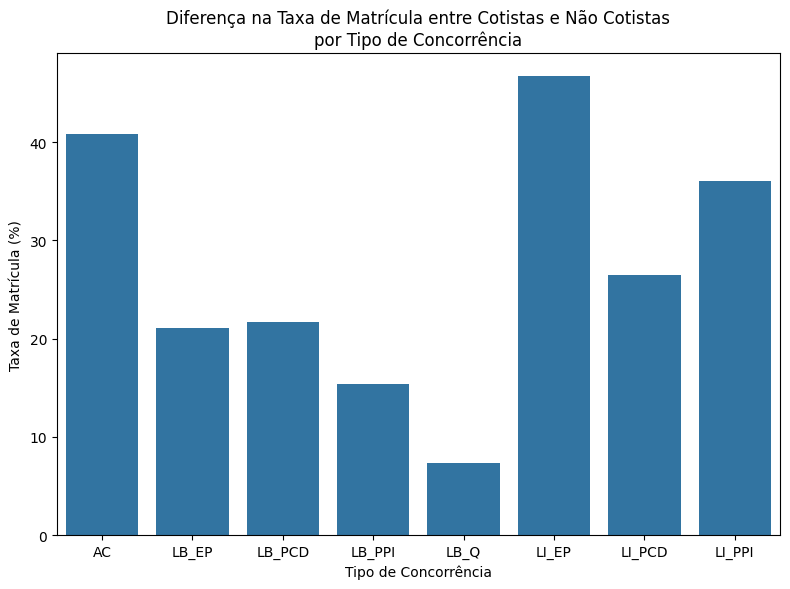

In [286]:
# Calcular a taxa de matrícula para cada tipo de concorrência
# Já temos a coluna 'Matriculado' que indica True se o candidato foi matriculado
taxa_cotistas = df_aprovados.groupby('TIPO_CONCORRENCIA')['Matriculado'].mean() * 100

print("Taxa de Matrícula por Tipo de Concorrência:")
print(taxa_cotistas)

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=taxa_cotistas.index, y=taxa_cotistas.values)
plt.xlabel("Tipo de Concorrência")
plt.ylabel("Taxa de Matrícula (%)")
plt.title("Diferença na Taxa de Matrícula entre Cotistas e Não Cotistas\npor Tipo de Concorrência")
plt.tight_layout()
plt.show()

Sim, possuem taxas de matriculas diferentes, no geral sendo maior para não cotistas.